# <font color='blue'>Grafos e Álgebra Linear</font>

## Jorge Luiz Franco  <br>
ICMC-USP

----

Baseado nas aulas dos profs: Cynthia Lage Ferreira e Luis Gustavo Nonato

#Matrizes

In [109]:
import numpy as np

: 

In [110]:
A= np.array([[1,2,3], [3,2,1], [5,4,4]])

In [111]:
B= A.T

In [ ]:
np.dot(A,B)

In [113]:
x= np.array([1,2,3])

In [ ]:
A

In [ ]:
np.dot(A,x)

# Grafos

In [117]:
import networkx as nx

In [ ]:
nx.draw(nx.complete_graph(8))

https://networkx.org/documentation/stable/reference/classes/graph.html#networkx.Graph

In [119]:
G= nx.Graph()

In [120]:
G.add_node('a')

In [121]:
G.add_node('b')

In [122]:
G.add_edge('a', 'b')

In [ ]:
nx.draw(G, with_labels=True)

In [124]:
G.add_edge('a','c')

In [125]:
G.add_edge('a','d')

In [126]:
G.add_edge('d','c')

In [127]:
G.add_edge('d','e')
G.add_edge('d','f')
G.add_edge('f','e')

In [ ]:
nx.draw(G, with_labels=True)

### Definição da Matriz de Adjacência simples

Em teoria dos grafos, a **matriz de adjacência** é uma matriz quadrada usada para representar um grafo finito. Os elementos da matriz indicam se os pares de vértices estão adjacentes ou não no grafo.

Para um grafo $G = (V, E)$ com $n$ vértices, a matriz de adjacência $A$ é uma matriz $n \times n$, onde o elemento $A_{ij}$ é definido como:

$$
A_{ij} =
\begin{cases}
1, & \text{se existe uma aresta do vértice } i \text{ para o vértice } j \\
0, & \text{caso contrário}
\end{cases}
$$


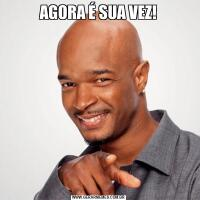



### Qual a matriz de adjacência do grafo anterior?

https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_numpy_array.html

In [ ]:
nx.draw(nx.from_numpy_array(adj))

https://networkx.org/documentation/stable/reference/generated/networkx.linalg.graphmatrix.adjacency_matrix.html

In [130]:
adj= nx.adjacency_matrix(G).todense()

In [ ]:
check_symmetric(adj)

In [ ]:
nx.draw(nx.from_numpy_array(adj))

### Grafos direcionados

In [134]:
DG = nx.DiGraph()

In [135]:
DG.add_edge(0, 1)

In [ ]:
nx.draw(DG)

In [137]:
dir_adj= np.array([[0, 0, 0, 1], [1 , 0, 1, 1], [1 , 1, 0, 0], [1, 1, 1, 0]])

In [138]:
DG = nx.from_numpy_array(dir_adj, create_using=nx.DiGraph)

In [ ]:
nx.draw(DG)

### Que propriedade interessante as matrizes de adjacência tem? Em termos de dimensões

In [ ]:
adj.shape

### As matrizes são quadradas, logo conseguimos calcular autovalores e autovetores

https://numpy.org/doc/2.0/reference/generated/numpy.linalg.eigh.html

https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

Qual dos métodos usamos para a matriz de adjacência do Grafo sem direção? Qual usamos para o Direcionado?

#### Calcule para ambos

In [ ]:
print(np.linalg.eigh(adj))

In [ ]:
print(len(np.linalg.eigh(adj)[1]))

In [143]:
autovals , autovets = np.linalg.eig(dir_adj)

In [ ]:
print(autovals)

In [ ]:
print(autovets)

In [ ]:
print(len(autovets))

### Será que os autopares sempre são reais quando temos o grafo não direcionado?

RESPOSTA:  TEOREMA ESPECTRAL ( Prof Cynthia terça que vem)

# Centralidade

Considere uma rede com um conjunto de nós $ N = \{1, \ldots, n\} $ e uma matriz de adjacência $ g = [g_{ij}]_{i,j \in N} $, onde $ g_{ij} = 1 $ indica uma conexão do nó $ i $ para o nó $ j $ e $ g_{ij} = 0 $ indica a ausência dessa conexão.

Desejamos uma medida da importância de um nó, onde um nó é considerado importante se outros nós importantes estiverem conectados a ele. Por exemplo, um website importante é aquele que muitos outros websites importantes linkam.

Para deixar mais claro, veja o nosso grafo anterior

In [ ]:
nx.draw(G,with_labels=True)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


target_node = 'd'

targets= ['d', 'e']

node_colors = ['lightgray' if node not in targets else 'red' for node in G.nodes()]

nx.draw(G, with_labels=True, node_color=node_colors, node_size=500)

plt.show()


Fica claro, que esse nó tem uma propriedade interessante, que os outros não tem. Ele é um nó mais "central". É isso que iremos buscar quando trabalhamos com medidas de centralidade

### Degree Centrality

Uma dessas medidas é o grau. Ele é definido como o número de arestas de cada nó. Ou seja, o grau do nó `b` é 1, pois apenas uma aresta chega nele.

#### Ache no grafo não direcionado `G` os 2 nós com maior grau e plot com cores que os diferencia dos demais

In [ ]:
for i in range(len(G.nodes())):
    print(np.sum(adj[i]))

#### Faça o mesmo para o grafo direcionado, mas usando os conceitos de grau de saída(arestas saindo do vértice) e grau de entrada ( arestas chegando no vértice)

In [ ]:
for i in range(len(DG.nodes())):
    print(np.sum(dir_adj[:,i]))

In [ ]:
print(dir_adj)

In [ ]:
for i in range(len(DG.nodes())):
  print(dir_adj[i,:])

In [ ]:
for i in range(len(DG.nodes())):
  print(dir_adj[:,i])

In [ ]:
for i in range(len(DG.nodes())):
    print(np.sum(dir_adj[i,:]))

In [ ]:
nx.draw(DG, with_labels=True)

## Eigenvector Centrality



A medida é a **centralidade de "autovetor"**: um vetor não nulo $ c = (c_i)_{i \in N} $ tal que, para algum escalar $ \lambda > 0 $:

$$
\lambda c_i = \sum_{j \neq i} g_{ji} c_j \quad \text{para todo } i \in N.
$$

Isto é, a centralidade de cada nó $ i $ é proporcional à soma das centralidades de seus vizinhos.

Note que usamos $ g_{ji} $ em vez de $ g_{ij} $. Isso não importa para grafos não direcionados, mas para grafos direcionados, indica que a centralidade de um nó deriva da centralidade dos nós que apontam para ele.

### Interpretação
Quando nós “importantes” ou “prestigiados” apontam para você, isso te torna importante/prestigiado também. As equações permanecem válidas se multiplicarmos $ c $ por um escalar, então normalmente normalizamos $ c $ para que $ \sum_{i \in N} c_i = 1 $.

## Exemplo
Suponha $ n = 3 $ e a matriz de adjacência:

$$
g = \begin{bmatrix}
0 & 1 & 1 \\
1 & 0 & 1 \\
0 & 0 & 0
\end{bmatrix}
$$

A eigenvector centrality (com a normalização $ \sum_{i \in N} c_i = 1 $) é definida como a solução do sistema de equações:

$$
\begin{align*}
\lambda c_1 &= c_2 \\
\lambda c_2 &= c_1 \\
\lambda c_3 &= c_1 + c_2 \\
c_1 + c_2 + c_3 &= 1.
\end{align*}
$$

Resolvendo esse sistema, obtemos:

$$
\lambda = 1, \quad c_1 = c_2 = \frac{1}{4}, \quad c_3 = \frac{1}{2}.
$$




### Calcule o eigenvector centrality para o seguinte grafo na mão

In [ ]:
nx.draw(nx.complete_graph(4))

$$\lambda c_1 = c_2+c_3 + c_4$$
$$\lambda c_2 = c_1+c_3 + c_4$$
$$\lambda c_3 = c_1+c_2 + c_4$$
$$\lambda c_4 = c_1+c_2 + c_3$$

$$c1+c2+c3+c4 =1$$

Em notação matricial, a equação para o eigenvector centrality pode ser escrita como:

$$
\lambda c = A^T c,
$$

onde $ \lambda $ é um escalar (o maior autovalor), $ c $ é um vetor coluna $ n \times 1 $, e $ A^T $ é a transposta da matriz de adjacência $ A $ de tamanho $ n \times n $. Utilizamos $ A^T $ porque, em grafos direcionados, estamos interessados nos nós que apontam para o nó $ i $, ou seja, na soma $ \sum_{j \neq i} A_{ji} c_j $ no lado direito da equação.

Em outras palavras, $ c $ é um autovetor de $ A^T $, com $ \lambda $ sendo o autovalor correspondente.

De acordo com o **Teorema de Perron-Frobenius** da álgebra linear, para toda matriz irredutível e não-negativa, o maior autovalor é positivo, e os componentes do autovetor correspondente também são todos positivos. Isso implica que a equação $ \lambda c = A^T c $ tem uma solução positiva: $ \lambda $ é o maior autovalor de $ A^T $, e $ c $ é o autovetor correspondente.

### Interpretação como Frações de Longo Prazo

Uma interpretação útil da centralidade de autovetor é como o resultado de longo prazo de um processo de reprodução. Isso também explica por que essa medida está sempre bem definida para redes fortemente conectadas. Suponha que um "vírus" inicie em um nó aleatório do grafo. Em cada período, o vírus envia uma cópia de si mesmo ao longo de cada aresta partindo do nó onde ele se encontra, e depois morre. Assim, temos um vírus no período 1, $ |N_i| $ vírus no período 2 (onde $ |N_i| $ é o número de vizinhos de $ i $), $ \sum_{j \in N_i} |N_j| $ vírus no período 3, e assim por diante.

Deixando esse processo continuar indefinidamente, o vírus nunca desaparece (pois a rede é fortemente conectada), e podemos calcular a fração de longo prazo de vírus localizados em cada nó. Essa fração de longo prazo de vírus localizados no nó $ i $ é $ c_i $. Por quê? Porque a fração de longo prazo de vírus no nó $ i $ é proporcional à fração de longo prazo de vírus localizados nos nós que apontam para $ i $. Essa relação é justamente o que define a centralidade de autovetor.


### Calcule a eigenvector centrality dos grafos (G e DG) anteriores usando esse novo conceito

## <font color='blue'>Matrizes Positivas</font>

Uma matriz $n\times n$ onde todas as entradas são positivas, isto é $A_{ij}>0$, $\forall i,j$, é chamada de _matriz positiva_ e denotada por $\mathbf{A}>0$.

**OBS**: Não confunda a definição de matriz positiva com a definição matriz definida positiva.

**Raio Espectral**: O raio espectral de uma matriz $\mathbf{A}$ é definido como:

$$
\rho(\mathbf{A})=\max\{|\lambda|, \lambda \mbox{ autovalor de } \mathbf{A}\}
$$

*Limitantes para o Raio Espectral*

Seja $\mathbf{A}$ uma matriz $n\times n$ positiva, $r_i = \sum_k a_{ik}$ (soma dos elementos da linha $i$) e  $c_j = \sum_k a_{kj}$ (soma dos elementos da coluna $j$). Então temos:

$$
\min_i r_i \leq \rho(\mathbf{A}) \leq \max_i r_i\\
\min_j c_j \leq \rho(\mathbf{A}) \leq \max_j c_j
$$

*Normalização do Raio Espectral*

Podemos sempre normalizar uma matriz positiva de modo que seu raio espectral seja 1, pois, $\mathbf{A}x=\lambda x \rightarrow \frac{1}{\lambda}\mathbf{A}x=x$ logo $\rho(\mathbf{A})=r\Longrightarrow\rho(\mathbf{A}/r)=1$.

### Teoram de Perron:
Se $\mathbf{A}>0$ então $\rho(\mathbf{A})$ é um autovalor e o autovetor correspondente é positivo, ou seja, $\mathbf{A}$ possui um autopar da forma $(\rho(\mathbf{A}),\mathbf{v})$, onde $\mathbf{v}>0$. Além disso,

- $\rho(\mathbf{A})$ é o único autovalor no círculo espectral de $\mathbf{A}$, ou seja, $\forall$ autovalor $\lambda\neq\rho(\mathbf{A})$, $|\lambda|<\rho(\mathbf{A})$.


**OBS:** $\rho(\mathbf{A})\in \mathbb{R}$

**Demonstração**: [Meyer, C.D. 2001] Capítulo 8 (uma prova alternativa pode ser encontrata [aqui](https://iuuk.mff.cuni.cz/~rakdver/linalg/lesson15-9.pdf)).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = np.random.uniform(0.01,1.0,size=(30,30))

e_val, e_vec = np.linalg.eig(A)
print('Cinco maiores autovalores em valor absoluto:\n',e_val[:5])
print('\nAutovetor associado ao raio espectra:\n',e_vec[:,0])

p_eval = [(x.real,x.imag) for x in e_val]
id_max = np.argmax(np.abs(e_val))
e_val_max = np.abs(e_val[id_max])

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10, 5))
ax[0].set_aspect('equal')

t = np.linspace(0,6.28,50)
ax[0].plot(e_val_max*np.cos(t),e_val_max*np.sin(t))

for x,y in p_eval:
    if np.abs(y) > 1.0e-7:
        ax[0].scatter(x,y,color='gray',s=3)
    else:
        ax[0].scatter(x,y,color='blue',s=3)

ax[0].scatter(p_eval[id_max][0],p_eval[id_max][1],color='red')

ax[1].set_aspect('equal')
ax[1].set(xlim=(-2, 2), ylim=(-2, 2), autoscale_on=False)
for x,y in p_eval:
    if np.abs(y) > 1.0e-7:
        ax[1].scatter(x,y,color='gray',s=10)
    else:
        ax[1].scatter(x,y,color='blue',s=10)

ax[0].annotate('circulo espectral',xy=(e_val_max*np.cos(np.pi/3),e_val_max*np.sin(np.pi/3)),
                xytext=(-8,e_val_max*np.sin(np.pi/4)),arrowprops=dict(facecolor='black', shrink=0.01))

ax[0].text(-5,-7,'disco espectral')

#### Multiplicidade Algébrica e Geométrica
A multiplicidade algébrica de um autovalor $\lambda$, denotada $multalg(\lambda)$, é o número de vezes que $\lambda$ aparece como raíz do polinômio $\det(\mathbf{A}-\lambda \mathbf{I})$.

A multiplicidade geométrica de um autovalor $\lambda$, denotada $multgeo(\lambda)$, é a dimensão do núcleo da transformação $(\mathbf{A}-\lambda \mathbf{I})$.

### Propriedade 1:
Se $\mathbf{A}>0$ então $multalg(\rho(\mathbf{A}))=multgeo(\rho(\mathbf{A}))=1$.

**Demonstração**: [Meyer, C.D. 2001] Capítulo 8

A propriedade 2 garante que o autovetor $\mathbf{v}$ associado ao autovalor $r=\rho(\mathbf{A})$ é único. O vetor $\mathbf{p}=\frac{\mathbf{v}}{\|\mathbf{v}\|_1}$ ($\mathbf{v}$ dividido pela soma dos elementos de $\mathbf{v}$) é chamado de **vetor de Perron** da matriz $\mathbf{A}$ e o par $(r,\mathbf{p})$ é chamado de **autopar de Perron**.

Note que, $\mathbf{A}>0\rightarrow\mathbf{A}^\top>0$ e como $\mathbf{A}$ e $\mathbf{A}^\top$ possuem os mesmos autovalores, então $r=\rho(\mathbf{A})$ é autovalor de $\mathbf{A}^T$.

Assim, temos que
$$\mathbf{A}^\top\mathbf{q}=r\mathbf{q}\Longrightarrow \mathbf{q}^\top\mathbf{A}=r\mathbf{q}^\top$$

Se $\mathbf{q}$ for normalizado como o vetor $\mathbf{p}$, então o vetor $\mathbf{q}^\top$ é chamado de **vetor de Perron à esquerda** da matriz $\mathbf{A}$.

**OBS**: Por definição, $\mathbf{p}=[p_1,\ldots,p_n]$, $\sum_i p_i = 1$

## <font color='blue'>Matrizes Não-Negativas</font>

Vamos analisar agora a possibilidade de que a matriz admita entradas iguais a zero, ou seja, uma matriz $\mathbf{A}$ é não-negativa se $\mathbf{A}\geq 0$.

Neste caso, não é difícil mostrar que:

- $r=\rho(\mathbf{A})$ é autovalor de $\mathbf{A}$ (porém $r=0$ é possível)
- $\mathbf{A}\mathbf{v}=r\mathbf{v}$ para algum $\mathbf{v}\in\mathcal{N}=\{\mathbf{x}|\mathbf{x}\geq 0, \mathbf{x}\neq 0\}$

**OBS**: Além do fato de $r=0$ ser possível e do autovetor associado a $r$ ser não-negativo (ao invés de positivo), sem hipóteses adicionais, as seguintes propridades de matrizes positivas deixam de valer para matrizes não-negativa:

- A multiplicidade algébrica e geométrica de $r$ pode não ser 1
- $r$ pode não ser o único autovalor no circulo espectral de $\mathbf{A}$

In [152]:
import numpy as np
from scipy.sparse.linalg import eigs as eigs

In [ ]:
A = np.random.uniform(0,1,size=(10,10))

A[np.random.randint(0,10,5),np.random.randint(0,10,5)] = 0.0
#print(A)

lbda, v = eigs(A,k=5,which='LM')
print(lbda)

for i in lbda:
    print(np.linalg.norm(i))

## <font color='blue'>Matrizes Redutíveis</font>
Uma matriz não-negativa $\mathbf{A}$ é dita _redutível_ se existe uma matriz de permutação $\mathbf{P}$ tal que

$$
\mathbf{P}^\top\mathbf{A}\mathbf{P} =
\begin{bmatrix}
\mathbf{X} & \mathbf{Y}\\
0 & \mathbf{W}
\end{bmatrix}
$$

Caso contrário a matriz é chamada _irredutível_. A transformação $\mathbf{P}^\top\mathbf{A}\mathbf{P}$ troca a posição de linhas e colunas com mesmo índice.

In [ ]:
import numpy as np

A = np.asarray([[2,0],[3,4]])
P = np.asarray([[0,1],[1,0]])

print('A=\n',A)
print('\nP=\n',P)

print('\nP.T A P=\n',np.dot(P.T,np.dot(A,P)))

### Grafo associado a matriz Não-Negativa

Uma **matriz não-negativa** $\mathbf{A}$ $n\times n$ pode ser associada a um **grafo dirigido** $\mathcal{G}(\mathbf{A})$ com $n$ vértices $\{v_1,\ldots,v_n\}$ no qual uma aresta saindo do vértice $v_i$ para o vértice $v_j$ se e só se $A_{ij}>0$.

- $\mathcal{G}(\mathbf{P}^\top\mathbf{A}\mathbf{P}) = \mathcal{G}(\mathbf{A})$, uma vez que a permutação tem apenas o efeito de reindexar os vértices.
- $\mathcal{G}(\mathbf{A})$ é dita _fortemente connectado_ se para qualquer par de vértices $v_i$ e $v_j$ existe um caminho dirigido saindo de $v_i$ e chegando em $v_j$.



In [155]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
n = 10
idr = np.random.randint(0,n,15)
idc = np.random.randint(0,n,15)
A = np.zeros((n,n))
A[idr,idc] = 1
print(A)

In [ ]:
edges = np.where(A > 0)
X = np.random.uniform(0,1,size=(n,2))

f,ax = plt.subplots(figsize=(6,6))
for i in zip(edges[0],edges[1]):
    dx = np.array([X[i[1],0]-X[i[0],0],X[i[1],1]-X[i[0],1]])
    ax.arrow(X[i[0],0],X[i[0],1],dx[0],dx[1],head_width=0.03,length_includes_head=True)

eps = 0.01
for i in range(n):
    ax.scatter(X[i,0],X[i,1])
    ax.text(X[i,0]+eps,X[i,1]+eps,str(i))

### Propriedade 2:
Uma matriz não-negativa $\mathbf{A}$ é irredutível se e só se $\mathcal{G}(\mathbf{A})$ é fortemente connectado.

### <font color='blue'>Teorema de Perron-Frobenius</font>
Seja $\mathbf{A}$ uma matriz não-negativa irredutível, então $\mathbf{A}$ tem as seguintes propriedades:

- $r=\rho(\mathbf{A})$, $r>0$ é autovalor de $\mathbf{A}$<br><br>

- $multalg(r)=multgeo(r)=1$<br><br>

- O autovetor $\mathbf{A}\mathbf{p}=r\mathbf{p}$, $\mathbf{p}>0$, $\|\mathbf{p}\|_1=1$ é único (vetor de Perron)

**OBS**:

1. A única propriedade de matriz positiva não assegurada por uma matriz irredutível é a unicidade de $r$ no círuclo espectral. Porém, se $\mathbf{A}$ é irredutível, temos que $multalg(r)=1$.

2. Outra questão importante é como verificar se uma matriz é irredutível

## <font color='blue'>Matrizes Primitivas</font>
Uma matriz não-negativa irredutível que contém apenas um autovalor $r=\rho(\mathbf{A})$ no seu círculo espectral é chamada _matriz primitiva_, caso contrário a matriz é chamada _imprimitiva_.

### Propriedade 4: (teste de Frobenius)
Uma matriz $\mathbf{A}\geq 0$ é primitiva se e só se $\mathbf{A}^m>0$ para algum $m$.